## DESCRIPTION

Reduce the time a Mercedes-Benz spends on the test bench.

#### Problem Statement Scenario:
Since the first automobile, the Benz Patent Motor Car in 1886, Mercedes-Benz has stood for important automotive innovations. These include the passenger safety cell with a crumple zone, the airbag, and intelligent assistance systems. Mercedes-Benz applies for nearly 2000 patents per year, making the brand the European leader among premium carmakers. Mercedes-Benz is the leader in the premium car industry. With a huge selection of features and options, customers can choose the customized Mercedes-Benz of their dreams.

To ensure the safety and reliability of every unique car configuration before they hit the road, the company’s engineers have developed a robust testing system. As one of the world’s biggest manufacturers of premium cars, safety and efficiency are paramount on Mercedes-Benz’s production lines. However, optimizing the speed of their testing system for many possible feature combinations is complex and time-consuming without a powerful algorithmic approach.

You are required to reduce the time that cars spend on the test bench. Others will work with a dataset representing different permutations of features in a Mercedes-Benz car to predict the time it takes to pass testing. Optimal algorithms will contribute to faster testing, resulting in lower carbon dioxide emissions without reducing Mercedes-Benz’s standards.

#### Following actions should be performed:

If for any column(s), the variance is equal to zero, then you need to remove those variable(s).  
Check for null and unique values for test and train sets.  
Apply label encoder.  
Perform dimensionality reduction.  
Predict your test_df values using XGBoost.  

## Step 1: Data Preprocessing

#### 1.0 Import necessary libraries

In [36]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

#### 1.1 Load data

In [15]:
df_benz_train=pd.read_csv("Dataset/train.csv")
df_benz_test=pd.read_csv("Dataset/test.csv")

#### 1.2 Check data

In [16]:
print(df_benz_train.shape)
print(df_benz_test.shape)

(4209, 378)
(4209, 377)


In [19]:
df_benz_train.head(2)

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0


In [18]:
df_benz_test.head(2)

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0


In [17]:
print(df_benz_train.info())
print(df_benz_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 378 entries, ID to X385
dtypes: float64(1), int64(369), object(8)
memory usage: 12.1+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 377 entries, ID to X385
dtypes: int64(369), object(8)
memory usage: 12.1+ MB
None


We found that Column y is only available in Training set. Target Variable. "y" is the target variable we need to predict. So let us do some analysis on this variable first.

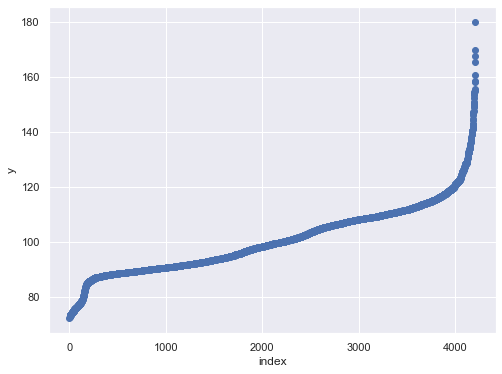

In [37]:
plt.figure(figsize=(8,6))
plt.scatter(range(df_benz_train.shape[0]), np.sort(df_benz_train.y.values))
plt.xlabel('index', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.show()

In [ ]:
Lets plot distribution curve:

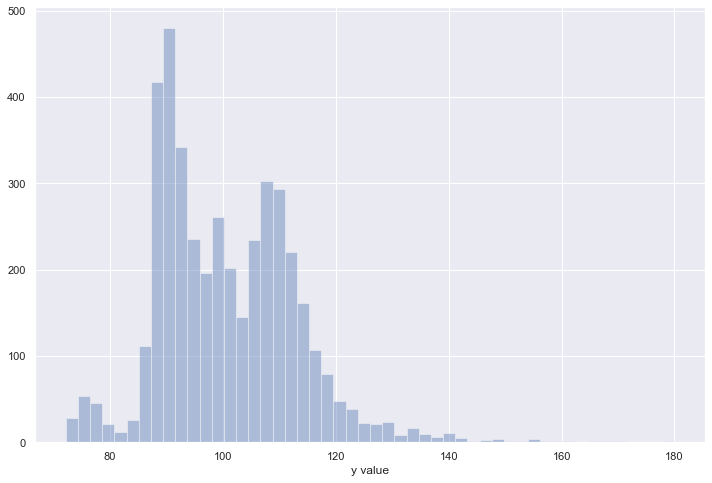

In [38]:
ulimit = 180
df_benz_train['y'].ix[df_benz_train['y']>ulimit] = ulimit

plt.figure(figsize=(12,8))
sns.distplot(df_benz_train.y.values, bins=50, kde=False)
plt.xlabel('y value', fontsize=12)
plt.show()

In [10]:
#find columns that are object type
df_benz_train.select_dtypes('object').columns

Index(['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8'], dtype='object')

In [12]:
#find columns that are float type
df_benz_train.select_dtypes('float64').columns

Index(['y'], dtype='object')

In [14]:
#check for null values
data = df_benz_train.isnull().sum()
data[data >0]

Series([], dtype: int64)

In [20]:
#check for null values in test dataset
data = df_benz_test.isnull().sum()
data[data >0]

Series([], dtype: int64)

None of the columns in both Train and test dataset has null values - Good News!!!!

In [21]:
df_benz_train.describe()

,ID,y,X10,X11,X12,X13,X14,X15,X16,X17,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
count,4209.000000,4209.000000,4209.000000,4209.0,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,...,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000
mean,4205.960798,100.669318,0.013305,0.0,0.075077,0.057971,0.428130,0.000475,0.002613,0.007603,...,0.318841,0.057258,0.314802,0.020670,0.009503,0.008078,0.007603,0.001663,0.000475,0.001426
std,2437.608688,12.679381,0.114590,0.0,0.263547,0.233716,0.494867,0.021796,0.051061,0.086872,...,0.466082,0.232363,0.464492,0.142294,0.097033,0.089524,0.086872,0.040752,0.021796,0.037734
min,0.000000,72.110000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2095.000000,90.820000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4220.000000,99.150000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6314.000000,109.010000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8417.000000,265.320000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Integer type variable analysis:

In [39]:
unique_values_dict = {}
for col in df_benz_train.columns:
    if col not in ["ID", "y", "X0", "X1", "X2", "X3", "X4", "X5", "X6", "X8"]:
        unique_value = str(np.sort(df_benz_train[col].unique()).tolist())
        tlist = unique_values_dict.get(unique_value, [])
        tlist.append(col)
        unique_values_dict[unique_value] = tlist[:]
for unique_val, columns in unique_values_dict.items():
    print("Columns containing the unique values : ",unique_val)
    print(columns)
    print("--------------------------------------------------")

Columns containing the unique values :  [0, 1]
['X10', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'X24', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31', 'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41', 'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X51', 'X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59', 'X60', 'X61', 'X62', 'X63', 'X64', 'X65', 'X66', 'X67', 'X68', 'X69', 'X70', 'X71', 'X73', 'X74', 'X75', 'X76', 'X77', 'X78', 'X79', 'X80', 'X81', 'X82', 'X83', 'X84', 'X85', 'X86', 'X87', 'X88', 'X89', 'X90', 'X91', 'X92', 'X94', 'X95', 'X96', 'X97', 'X98', 'X99', 'X100', 'X101', 'X102', 'X103', 'X104', 'X105', 'X106', 'X108', 'X109', 'X110', 'X111', 'X112', 'X113', 'X114', 'X115', 'X116', 'X117', 'X118', 'X119', 'X120', 'X122', 'X123', 'X124', 'X125', 'X126', 'X127', 'X128', 'X129', 'X130', 'X131', 'X132', 'X133', 'X134', 'X135', 'X136', 'X137', 'X138', 'X139', 'X140', 'X141', 'X142', 'X143', 'X144', 'X145'

So all the integer columns are binary with some columns have only one unique value 0. Possibly we could exclude those columns in our modeling activity.
Now let us explore the categorical columns present in the dataset.

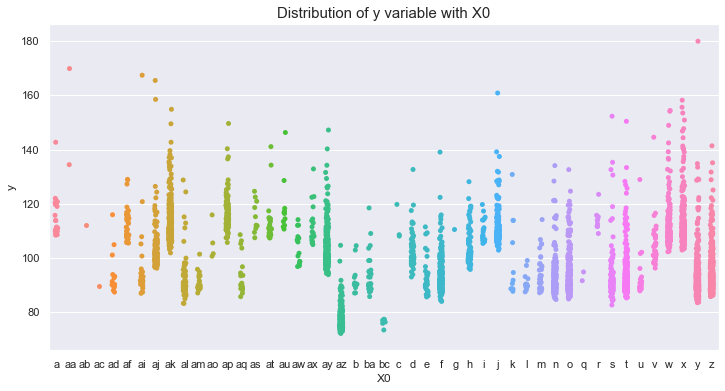

In [43]:
#Distribution of y variable with X0
var_name = "X0"
col_order = np.sort(df_benz_train[var_name].unique()).tolist()
plt.figure(figsize=(12,6))
sns.stripplot(x=var_name, y='y', data=df_benz_train, order=col_order)
plt.xlabel(var_name, fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of y variable with "+var_name, fontsize=15)
plt.show()

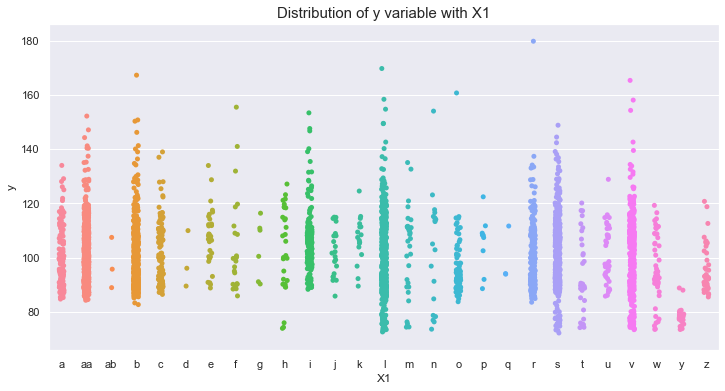

In [44]:
#Distribution of y variable with X1
var_name = "X1"
col_order = np.sort(df_benz_train[var_name].unique()).tolist()
plt.figure(figsize=(12,6))
sns.stripplot(x=var_name, y='y', data=df_benz_train, order=col_order)
plt.xlabel(var_name, fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of y variable with "+var_name, fontsize=15)
plt.show()

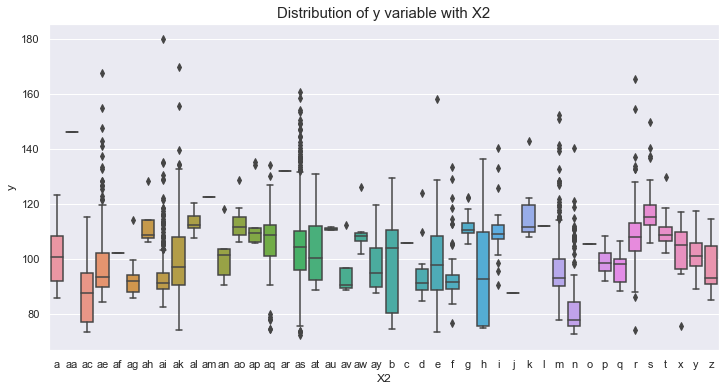

In [46]:
#Distribution of y variable with X2
var_name = "X2"
col_order = np.sort(df_benz_train[var_name].unique()).tolist()
plt.figure(figsize=(12,6))
sns.boxplot(x=var_name, y='y', data=df_benz_train, order=col_order)
plt.xlabel(var_name, fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of y variable with "+var_name, fontsize=15)
plt.show()

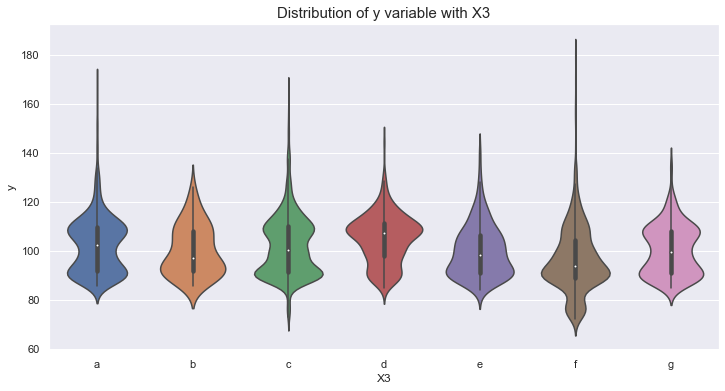

In [47]:
#Distribution of y variable with X3
var_name = "X3"
col_order = np.sort(df_benz_train[var_name].unique()).tolist()
plt.figure(figsize=(12,6))
sns.violinplot(x=var_name, y='y', data=df_benz_train, order=col_order)
plt.xlabel(var_name, fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of y variable with "+var_name, fontsize=15)
plt.show()

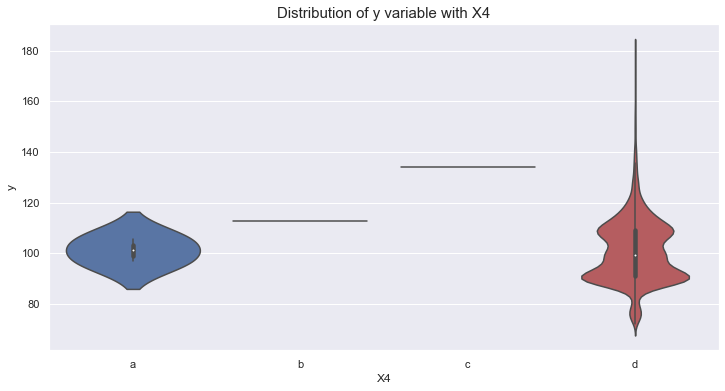

In [48]:
#Distribution of y variable with X4
var_name = "X4"
col_order = np.sort(df_benz_train[var_name].unique()).tolist()
plt.figure(figsize=(12,6))
sns.violinplot(x=var_name, y='y', data=df_benz_train, order=col_order)
plt.xlabel(var_name, fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of y variable with "+var_name, fontsize=15)
plt.show()

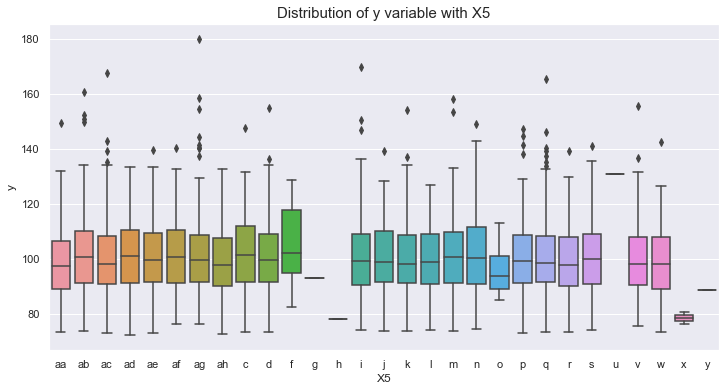

In [49]:
#Distribution of y variable with X5
var_name = "X5"
col_order = np.sort(df_benz_train[var_name].unique()).tolist()
plt.figure(figsize=(12,6))
sns.boxplot(x=var_name, y='y', data=df_benz_train, order=col_order)
plt.xlabel(var_name, fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of y variable with "+var_name, fontsize=15)
plt.show()

Binary Variables:
Now we can look into the binary variables. There are quite a few of them as we have seen before. Let us start with getting the number of 0's and 1's in each of these variables.

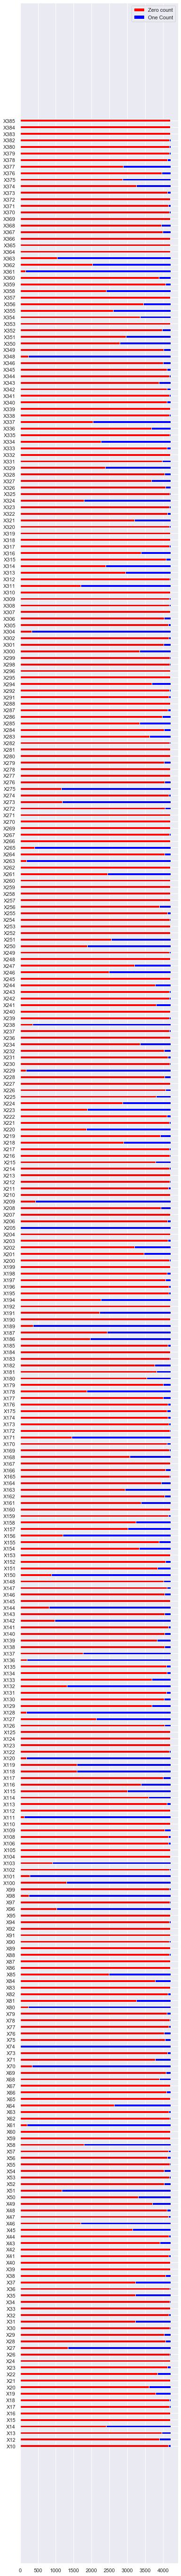

In [50]:
zero_count_list = []
one_count_list = []
cols_list = unique_values_dict['[0, 1]']
for col in cols_list:
    zero_count_list.append((df_benz_train[col]==0).sum())
    one_count_list.append((df_benz_train[col]==1).sum())

N = len(cols_list)
ind = np.arange(N)
width = 0.35

plt.figure(figsize=(6,100))
p1 = plt.barh(ind, zero_count_list, width, color='red')
p2 = plt.barh(ind, one_count_list, width, left=zero_count_list, color="blue")
plt.yticks(ind, cols_list)
plt.legend((p1[0], p2[0]), ('Zero count', 'One Count'))
plt.show()

Now let us check the mean y value in each of the binary variable.

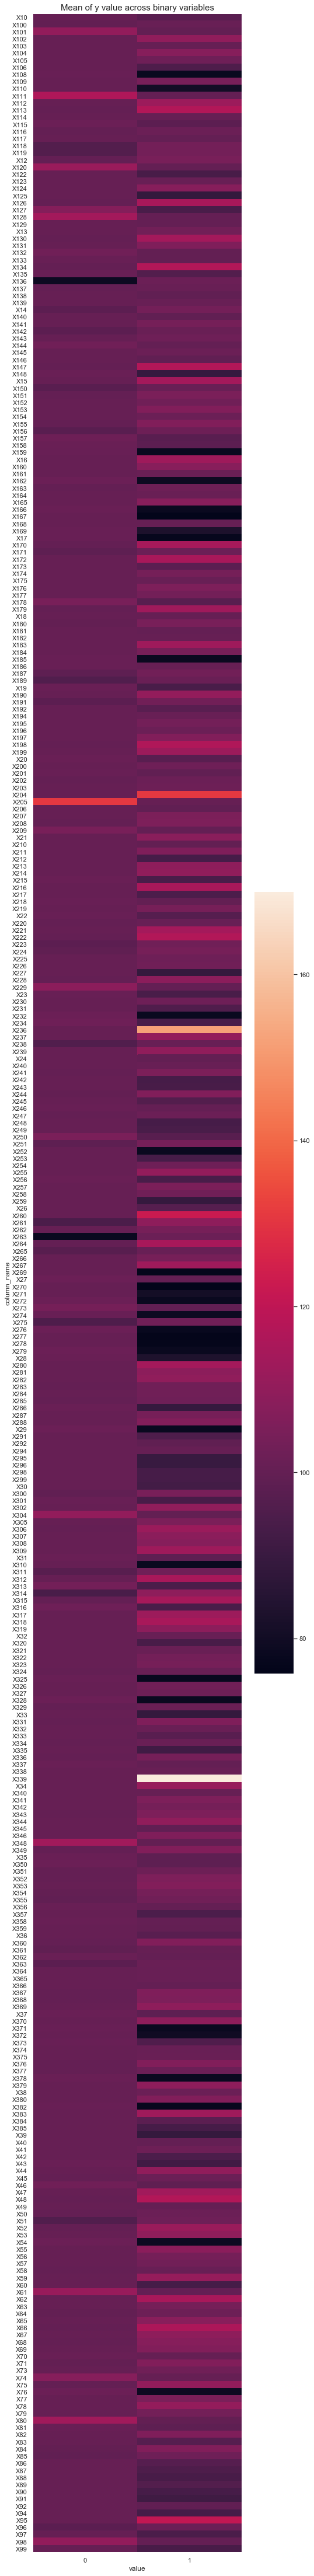

In [52]:
zero_mean_list = []
one_mean_list = []
cols_list = unique_values_dict['[0, 1]']
for col in cols_list:
    zero_mean_list.append(df_benz_train.ix[df_benz_train[col]==0].y.mean())
    one_mean_list.append(df_benz_train.ix[df_benz_train[col]==1].y.mean())

new_df = pd.DataFrame({"column_name":cols_list+cols_list, "value":[0]*len(cols_list) + [1]*len(cols_list), "y_mean":zero_mean_list+one_mean_list})
new_df = new_df.pivot('column_name', 'value', 'y_mean')

plt.figure(figsize=(8,80))
sns.heatmap(new_df)
plt.title("Mean of y value across binary variables", fontsize=15)
plt.show()

Binary variables which shows a good color difference in the above graphs between 0 and 1 are likely to be more predictive given the the count distribution is also good between both the classes (can be seen from the previous graph). We will dive more into the important variables in the later part of the notebook.

ID variable:
One more important thing we need to look at it is ID variable. This will give an idea of how the splits are done across train and test (random or id based) and also to help see if ID has some potential prediction capability (probably not so useful for business)
Let us first see how the 'y' variable changes with ID variable.

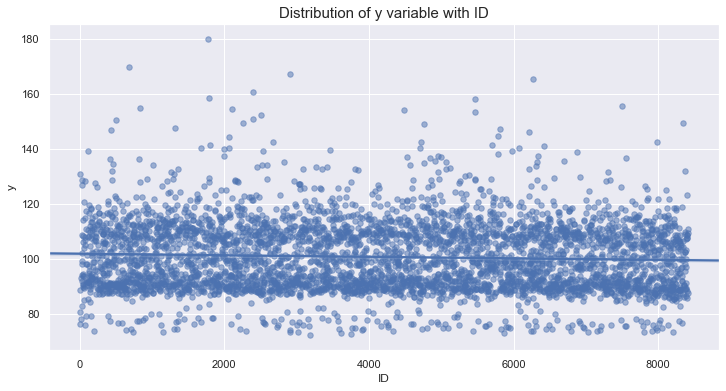

In [53]:
var_name = "ID"
plt.figure(figsize=(12,6))
sns.regplot(x=var_name, y='y', data=df_benz_train, scatter_kws={'alpha':0.5, 's':30})
plt.xlabel(var_name, fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of y variable with "+var_name, fontsize=15)
plt.show()

There seems to be a slight decreasing trend with respect to ID variable. Now let us see how the IDs are distributed across train and test.

<Figure size 432x720 with 0 Axes>

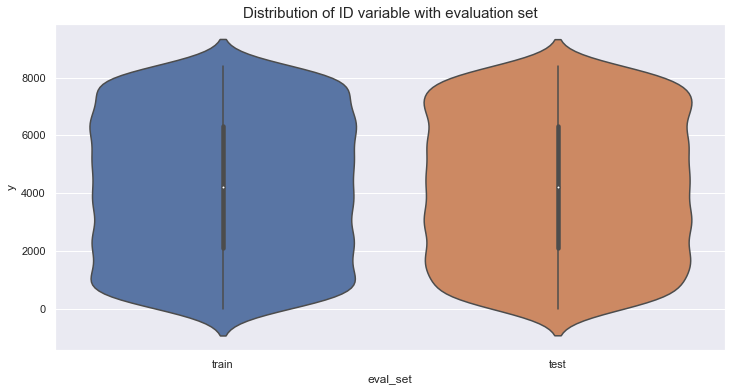

In [56]:
plt.figure(figsize=(6,10))
df_benz_train['eval_set'] = "train"
df_benz_test['eval_set'] = "test"
full_df = pd.concat([df_benz_train[["ID","eval_set"]], df_benz_test[["ID","eval_set"]]], axis=0)

plt.figure(figsize=(12,6))
sns.violinplot(x="eval_set", y='ID', data=full_df)
plt.xlabel("eval_set", fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of ID variable with evaluation set", fontsize=15)
plt.show()

Seems like a random split of ID variable between train and test samples.
Important Variables:
Now let us run and xgboost model to get the important variables.

In [58]:
from sklearn.preprocessing import LabelEncoder
for f in ["X0", "X1", "X2", "X3", "X4", "X5", "X6", "X8"]:
        labelencoder=LabelEncoder()
        df_benz_train[f] =labelencoder.fit_transform(df_benz_train[f].values) 

In [59]:
df_benz_train.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X376,X377,X378,X379,X380,X382,X383,X384,X385,eval_set
0,0,130.81,32,23,17,0,3,24,9,14,...,0,1,0,0,0,0,0,0,0,train
1,6,88.53,32,21,19,4,3,28,11,14,...,0,0,0,0,0,0,0,0,0,train
2,7,76.26,20,24,34,2,3,27,9,23,...,0,0,0,0,0,1,0,0,0,train
3,9,80.62,20,21,34,5,3,27,11,4,...,0,0,0,0,0,0,0,0,0,train
4,13,78.02,20,23,34,5,3,12,3,13,...,0,0,0,0,0,0,0,0,0,train


In [60]:
x_train = df_benz_train.drop(["ID", "y", "eval_set"], axis=1)
y_train = df_benz_train['y'].values

In [73]:
#Dimmensionality Reduction
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
print('before{}'. format(x_train.shape))
x_train=pca.fit_transform(x_train)
print('after{}'. format(x_train.shape))

before(4209, 376)
after(4209, 6)


In [81]:
from sklearn.model_selection import KFold,cross_val_score
import xgboost as xgb
seed=7
num_trees=30
kfold=KFold(n_splits=10,random_state=seed)

def xgb_r2_score(preds, dtrain):
    labels = dtrain.get_label()
    return 'r2', r2_score(labels, preds)

xgb_params = {
    'eta': 0.05,
    'max_depth': 6,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'silent': 1
}
dtrain = xgb.DMatrix(x_train, y_train, feature_names=np.array(x_train).columns.values)
model = xgb.train(dict(xgb_params, silent=0), dtrain, num_boost_round=100, feval=xgb_r2_score, maximize=True)

#n_estimators=num_trees,random_state=seed)
results=cross_val_score(model,x_train,y_train,cv=kfold)
print(results.mean())

AttributeError: 'numpy.ndarray' object has no attribute 'columns'